# CMSC 422 Final Project
 Dev Bhardwaj - UID: 117212624 <br>
 Neal Machado - UID: 117143096 <br> 
 Michael Xie - UID: 117226089 <br>


***
## Part 1: Motivation

Heart Disease is an extremely pressing issue in the United States, as it is the leading cause of death for men, women, and people of most racial and ethnic groups in the U.S. Approximately 697,000 people die of heart disease in the United States annually, which is approximately one in five deaths. Due to the vast impact that heart disease has on millions of people, we believe that there is a lot of value in being able to predict whether someone is at risk of developing heart disease based on a variety of factors, such as BMI, whether or not they smoke, age, diabetes, etc. We also want to be able to observe which factors are most or least indicative of the presence of heart disease. With these results, we may be able to catch heart disease sooner and warn people who may have higher risk of catching heart disease. We also hope to gain a deeper understanding of what causes heart disease so that people can take preventative measures in order to avoid it. 

***
## Part 2: Data Processing

The first thing we did was import our data, which we got from https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease. This dataset was from the 2020 annual CDC survey data relating to health status.The total number of observations for this dataset was around 400k. In order to save time and space, we randomly sampled 50k observations from the original dataset.

Before we even imported our data, however, we changed certain values in the Diabetes column. Very few of the entries had "no, borderline" instead of "yes" or "no" for diabetes. This comma gave us errors when trying to read the CSV, so we changed all the "no, borderline" values to simply "no."

This dataset had originally 18 features (including whether or not the person has heart disease) so our original X dimension is 17.


In [1]:
import pandas as pd
import numpy as np

# import our dataset
df = pd.read_csv('data/heart_2020_cleaned.csv', sep=',')

# randomly sample 50000 datapoints 
df = df.sample(n=50000, random_state=1)
df2 = df
df2

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
301988,No,24.30,No,No,No,0,15,No,Female,40-44,White,No,Yes,Excellent,7,No,No,No
223127,Yes,23.78,Yes,No,Yes,0,0,Yes,Female,80 or older,Black,Yes,No,Good,7,No,No,No
216797,No,20.60,Yes,No,No,0,0,No,Female,70-74,White,No,Yes,Good,7,No,No,No
234217,No,28.29,Yes,No,No,0,20,No,Female,25-29,White,No,No,Good,4,No,No,No
30822,Yes,33.00,No,No,No,0,0,No,Male,75-79,White,Yes,Yes,Excellent,8,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174257,No,28.06,Yes,No,No,5,0,No,Male,65-69,White,Yes,No,Very good,7,No,Yes,No
14690,No,26.63,No,Yes,No,0,1,No,Male,30-34,Hispanic,No,Yes,Excellent,7,No,No,No
234873,No,23.91,No,Yes,No,0,2,No,Female,25-29,White,No,Yes,Excellent,8,No,No,No
181558,No,22.52,Yes,No,No,0,0,No,Male,60-64,White,No,No,Very good,7,No,No,No


The features of our dataset included categorical values as well as numerical values. In order to run our learning algorithms on the data, we had to one-hot encode our data. For the categorical data, such as Skin Cancer, the original data simply had words such as “Yes” or “No” as the features of the data. To make it suitable for our algorithms, we split the original column into two columns, named Skin Cancer Yes or Skin Cancer No, and put 1 or 0 depending on the original value of the feature. For the numerical values, the process was a little bit trickier. To one hot encode the numerical data, we first binned it into different ranges to make it a categorical variable. The manner in which we binned each variable was in a way that made sense to us. For example, for BMI, the original data were just the numerical values of each person’s BMI. The CDC website has ranges of BMIs for different categories such as Underweight, Healthy, Overweight, or Obese (https://www.cdc.gov/healthyweight/assessing/index.html). The way that we binned this feature was by creating a new column for each of these categories, and then converting the numerical value into one of these categorical values based on the ranges on the CDC website.


In [2]:
# binning our continuous numerical values
df2.BMI = pd.cut(df.BMI, bins=[0,18.5, 24.9, 29.9, 999], labels=['Underweight', 'Healthy', 'Overweight', 'Obese'])
df2.PhysicalHealth = pd.cut(df.PhysicalHealth, bins=[-1, 10, 20, 999], labels=['Low', 'Medium', 'High'])
df2.MentalHealth = pd.cut(df.MentalHealth, bins=[-1, 10, 20, 999], labels=['Low', 'Medium', 'High'])
df2.SleepTime = pd.cut(df.SleepTime, bins=[-1, 3, 6, 8, 12, 100], labels=['VeryLow', 'Low', 'Medium', 'High', 'VeryHigh'])

# one-hot encoding everything
df3 = pd.DataFrame()
df3.index = df2.index 
Y_data = []

# instead of having one-hot encoded Y-data, for most of our models we use binary (-1 for false, 1 for true)
for i in range(len(df2)):
    if df2.iloc[i, 0] =="No":
        Y_data.append(-1)
    else:
        Y_data.append(1)            # 1 means yes for heart disease, -1 means no

# add the Y_data to our dataframe
Y_data = np.array(Y_data)
for column in df2:
    df3 = df3.join(pd.get_dummies(df2[column], prefix=column+'_'))

df3

,HeartDisease__No,HeartDisease__Yes,BMI__Underweight,BMI__Healthy,BMI__Overweight,BMI__Obese,Smoking__No,Smoking__Yes,AlcoholDrinking__No,AlcoholDrinking__Yes,...,SleepTime__Low,SleepTime__Medium,SleepTime__High,SleepTime__VeryHigh,Asthma__No,Asthma__Yes,KidneyDisease__No,KidneyDisease__Yes,SkinCancer__No,SkinCancer__Yes
301988,1,0,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
223127,0,1,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
216797,1,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0
234217,1,0,0,0,1,0,0,1,1,0,...,1,0,0,0,1,0,1,0,1,0
30822,0,1,0,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174257,1,0,0,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,1,0
14690,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
234873,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
181558,1,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,1,0,1,0


One-hot encoding the binary columns also gave us redundant columns (e.g. if the column label was originally Smoking, we now have a column for Smoking_No and Smoking_Yes). Because of this, we also had to remove certain columns to make sure we don't include useless data.

In [3]:
# for columns which were binary, one-hot encoding is redundant (1 in one row is a 0 in the other) so we delete
# cols for Smoking__No, AlcoholDrinking__No, Stroke__No, DiffWalking__No, Sex__Male, Diabetic__No, PhysicalActivity__No,
# KidneyDisease__No, SkinCancer__No
df3.drop(columns=['Smoking__No', 'AlcoholDrinking__No', 'Stroke__No', 'DiffWalking__No', 'Sex__Female', 'Diabetic__No', 'PhysicalActivity__No', 'Asthma__No', 'KidneyDisease__No', 'SkinCancer__No'], axis=1, inplace=True)

df3

,HeartDisease__No,HeartDisease__Yes,BMI__Underweight,BMI__Healthy,BMI__Overweight,BMI__Obese,Smoking__Yes,AlcoholDrinking__Yes,Stroke__Yes,PhysicalHealth__Low,...,GenHealth__Poor,GenHealth__Very good,SleepTime__VeryLow,SleepTime__Low,SleepTime__Medium,SleepTime__High,SleepTime__VeryHigh,Asthma__Yes,KidneyDisease__Yes,SkinCancer__Yes
301988,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
223127,0,1,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,0,0
216797,1,0,0,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
234217,1,0,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
30822,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174257,1,0,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
14690,1,0,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
234873,1,0,0,1,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
181558,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0


After one hot encoding our dataset, we used sklearn’s train_test_split function in order to break our data into 80% training data (40,000 examples), 10% testing data (5,000 examples), and 10% development data (5,000) examples

In [4]:
# get the X_data as numpy array
X_data = df3.iloc[:, 2:]
X_data = X_data.to_numpy()

# get our y data in the shape that our NN can compare to
nn_Y_data = df3.iloc[:,0:2]
nn_Y_data = nn_Y_data.to_numpy()

from sklearn.model_selection import train_test_split

# split data for decision tree, perceptron, and bayesian classifiers
X_train, X_test_dev, Y_train, Y_test_dev = train_test_split(X_data, Y_data, test_size=.2, random_state=1)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_test_dev, Y_test_dev, test_size=.5, random_state=1)

# split data for neural network
nn_X_train, nn_X_test_dev, nn_Y_train, nn_Y_test_dev = train_test_split(X_data, nn_Y_data, test_size=.2, random_state=1)
nn_X_dev, nn_X_test, nn_Y_dev, nn_Y_test = train_test_split(nn_X_test_dev, nn_Y_test_dev, test_size=.5, random_state=1)

***
## Part 3: Decision Tree

For our decision tree algorithm, we mostly reused the algorithm we wrote for project one. One important aspect to consider is that this decision tree algorithm does not utilize the feature selecting process of a traditional decision tree. Traditionally, decision trees select which feature to split on based on which feature would yield the most information gain, however, our decision tree simply looks at which feature would generate the least error if it were split upon. We ran our decision tree algorithm using depth as a hyperparameter. Ultimately, we found that the depth that yielded the highest accuracy was 6, giving us a testing accuracy of around 0.915. When we used higher depths, we found that there was clear evidence of overfitting. 

Training accuracy 0.919, test accuracy 0.915
Training classifier with maxDepth=1...
Training accuracy 0.916775, test accuracy 0.9146
Training classifier with maxDepth=2...
Training accuracy 0.916775, test accuracy 0.9146
Training classifier with maxDepth=4...
Training accuracy 0.917825, test accuracy 0.9148
Training classifier with maxDepth=5...
Training accuracy 0.91845, test accuracy 0.914
Training classifier with maxDepth=6...
Training accuracy 0.919, test accuracy 0.915
Training classifier with maxDepth=7...
Training accuracy 0.919375, test accuracy 0.9142
Training classifier with maxDepth=8...
Training accuracy 0.919775, test accuracy 0.9144
Training classifier with maxDepth=12...
Training accuracy 0.922825, test accuracy 0.9134
Training classifier with maxDepth=16...
Training accuracy 0.928175, test accuracy 0.9116


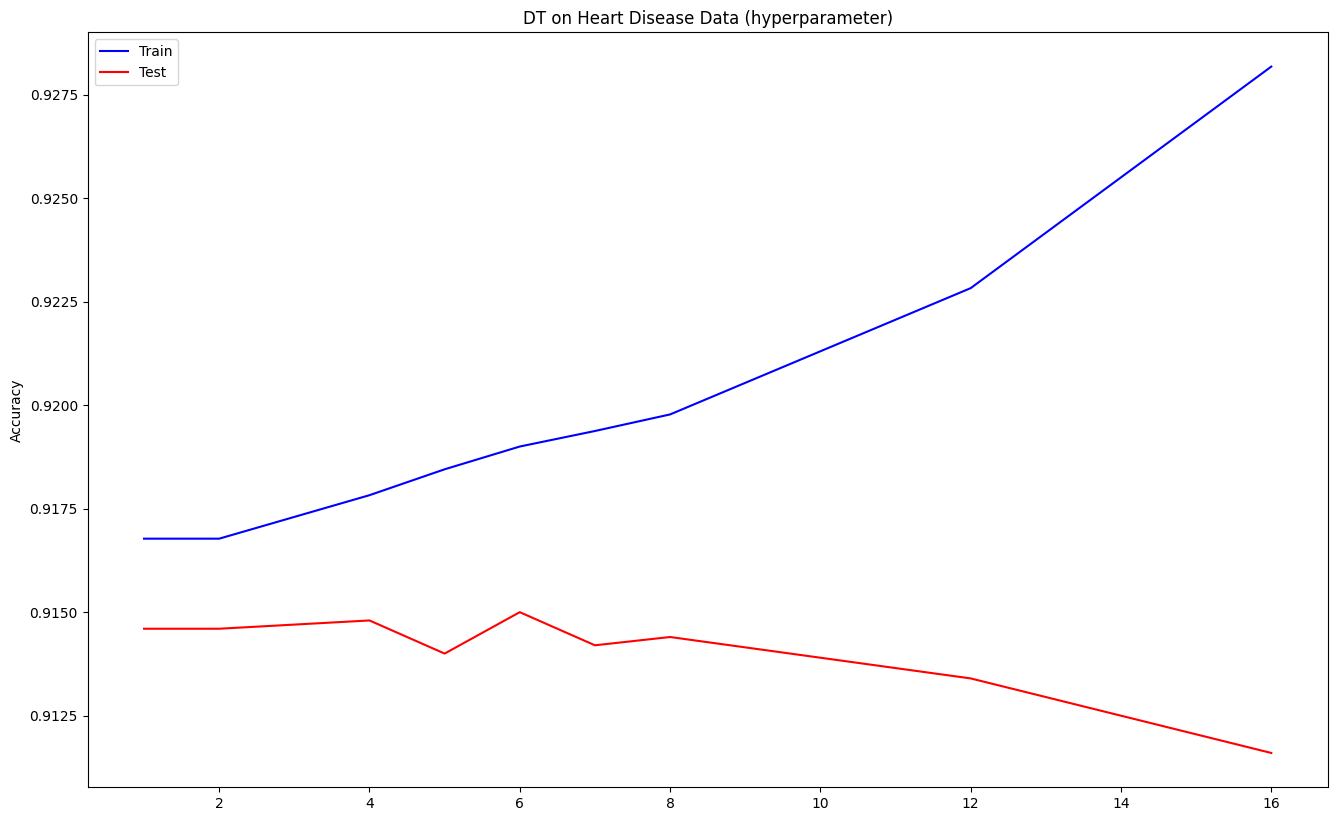

In [5]:
class heart_data:
    X = X_train
    Y = Y_train
    Xte = X_test
    Yte = Y_test

import dt
import runClassifier as runClassifier

# graph accuracy of our Decision Tree over depth
curve = runClassifier.hyperparamCurveSet(dt.DT({}), 'maxDepth', [1,2,4,5,6,7,8,12,16], heart_data)
runClassifier.plotCurve('DT on Heart Disease Data (hyperparameter)', curve)

We see that our decision tree reaches a maximum accuracy at depth of 6. Furthermore, we see that at any higher depth than this, our training accuracy increases while our test accuracy decreases, a sign of overfitting. Using a depth of 6 we get a test accuracy of .915.

In [9]:
h = dt.DT({'maxDepth': 6})
runClassifier.trainTest(h, X_train, Y_train, X_test, Y_test )

Training accuracy 0.919, test accuracy 0.915


(0.919, 0.915, array([-1., -1., -1., ..., -1., -1., -1.]))

***
## Part 4: Perceptron

 For our perceptron model, we originally reused the model we created in project one. However, it quickly became evident when graphing our training and testing accuracy over many epochs that our model was susceptible to misclassifications at the end of the training cycle that would drastically shift the weights that had performed well for most of the training, resulting in poor training and testing accuracy. This was particularly prevalent due to our dataset that had an imbalance in observations with and without heart disease with an approximate 1:9 ratio. As a result, when a rare example with heart disease came at the end, we were likely to misclassify. To solve this, we first tried to shuffle the dataset and our accuracy did improve, but the same situation was still possible. We then added an averaged option for our perceptron model that implements the averaged perceptron model. By averaging the weights and biases over all the updates and then updating our weights and biases before testing the model, we greatly increased its resistance to misclassifications at the end resulting in weights very different from those that performed well for most of the training.


In [16]:
import perceptron

runClassifier.trainTest(perceptron.Perceptron({'numEpoch': 7, 'averaged': False}), X_dev, Y_dev, X_test, Y_test)
runClassifier.trainTest(perceptron.Perceptron({'numEpoch': 7, 'averaged': True}), X_dev, Y_dev, X_test, Y_test)

Training accuracy 0.834, test accuracy 0.8284
Training accuracy 0.9176, test accuracy 0.913


(0.9176,
 0.913,
 array([ -9.18968571,   0.81031429, -14.18968571, ..., -15.18968571,
         -7.18968571, -17.18968571]))

As we can see, when our epochs is 7 the non-averaged perceptron has a much lower test and training accuracy than our averaged perceptron!

We then looked to graph our averaged perceptron over number of epochs. Note that there are still some significant dips in accuracy (again due to the split of our data), but it is much better than our non-averaged perceptron.

Training classifier with numEpoch=1...
Training accuracy 0.91585, test accuracy 0.9154
Training classifier with numEpoch=2...
Training accuracy 0.91745, test accuracy 0.9148
Training classifier with numEpoch=4...
Training accuracy 0.915675, test accuracy 0.9134
Training classifier with numEpoch=6...
Training accuracy 0.90675, test accuracy 0.9088
Training classifier with numEpoch=8...
Training accuracy 0.91235, test accuracy 0.9126
Training classifier with numEpoch=12...
Training accuracy 0.90735, test accuracy 0.9094
Training classifier with numEpoch=16...
Training accuracy 0.914275, test accuracy 0.9114
Training classifier with numEpoch=20...
Training accuracy 0.914425, test accuracy 0.9134
Training classifier with numEpoch=24...
Training accuracy 0.905975, test accuracy 0.9062
Training classifier with numEpoch=28...
Training accuracy 0.903325, test accuracy 0.9068
Training classifier with numEpoch=50...
Training accuracy 0.91485, test accuracy 0.9146
Training classifier with numEpoc

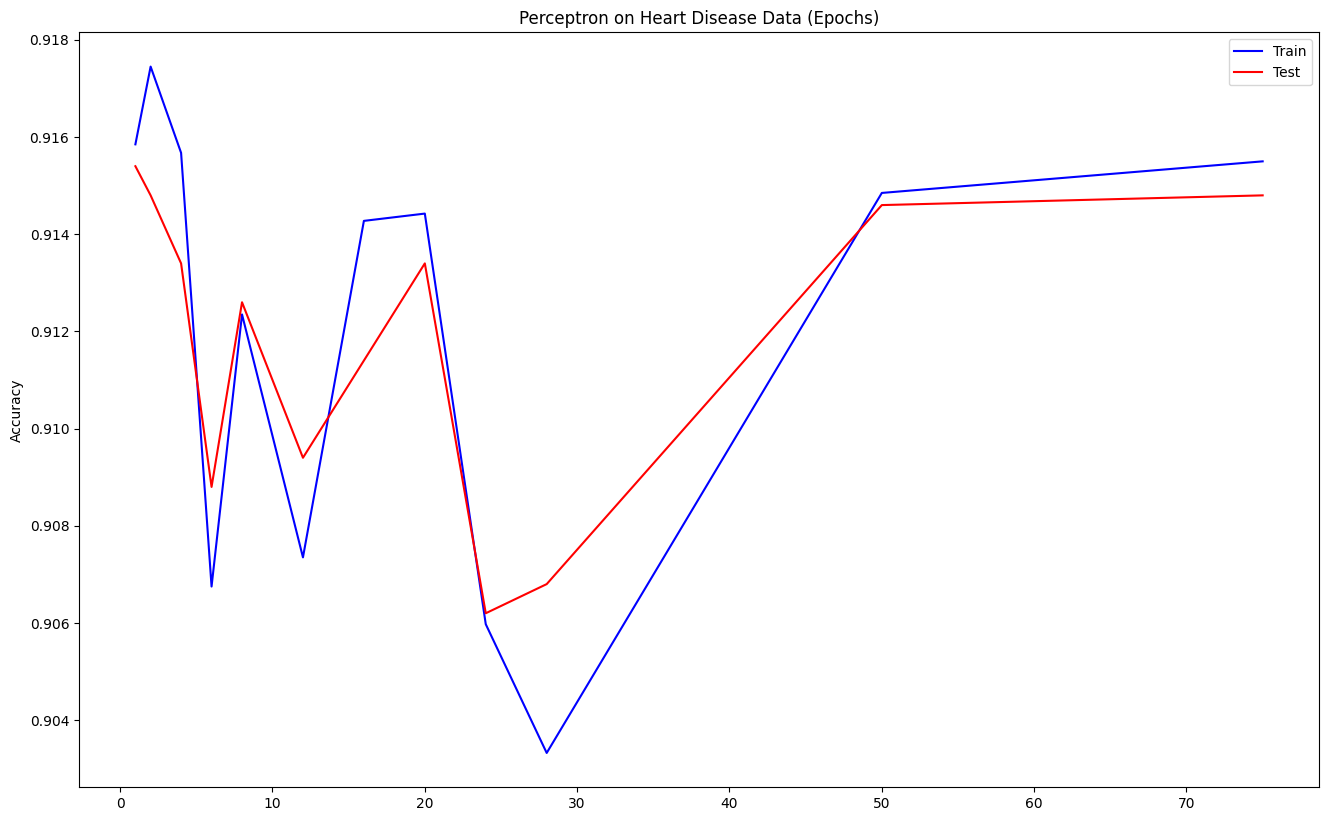

In [17]:

curve = runClassifier.hyperparamCurveSet(perceptron.Perceptron({'averaged': True}), 'numEpoch', [1,2,4,6,8,12,16,20,24,28,50,75], heart_data)
runClassifier.plotCurve('Perceptron on Heart Disease Data (Epochs)', curve)

***
## Part 5: Naive Bayesian Classifiers

For our Bayesian classifier, we imported two separate classifiers from sklearn. The first classifier we imported was the Gaussian Naive Bayes. After running this classifier on our dataset, we found that it misclassified 1234 out of 5000 examples, giving us a test accuracy of around 0.7532. The second classifier we imported was the Naive Complement Bayes, since we saw that it was supposed to adapt to skewed data sets (https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.ComplementNB.html). After running this classifier, we found that it misclassified 1125 out of 5000 examples, giving us a test accuracy of around 0.775. Here we see that the accuracies are lower than that of our previous algorithms, which may imply that the imbalanced nature of our dataset is giving us skewed accuracies for our previous algorithms.

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

# Gaussian Naive Bayes
gnb = GaussianNB()
y_pred = gnb.fit(X_train, Y_train).predict(X_test)
print("(Gaussian Naive Bayes): Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

# Complement Naive Bayes
clf2 = ComplementNB()
y_pred = clf2.fit(X_train, Y_train).predict(X_test)
print("(Complement Naive Bayes): Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (Y_test != y_pred).sum()))

(Gaussian Naive Bayes): Number of mislabeled points out of a total 5000 points : 1234
(Complement Naive Bayes): Number of mislabeled points out of a total 5000 points : 1125


***
## Part 6: Neural Network

DO ALL WRITEUP LATER

In [20]:
# imports and defining our model and hyperparameters

import numpy as np
from nn import NN
from nn import Relu, Linear, SquaredLoss, CELoss
from utils import data_loader, acc

model = NN(Relu(), SquaredLoss(), hidden_layers=[40,30], input_d=49, output_d=2)

lr = 1e-2
max_epoch = 20
batch_size = 128

In [23]:
# define an adjusted version of NN train in order to account for the shapes of our variables

def train(model, X_train, Y_train, X_dev, Y_dev, learning_rate, batch_size, max_epoch):
    for i in range(max_epoch):
        for X,Y in data_loader(X_train.T, Y_train.T, batch_size=batch_size, shuffle=True):
            training_loss, grad_Ws, grad_bs = model.compute_gradients(X, Y)
            model.update(grad_Ws, grad_bs, learning_rate)
        dev_acc = acc(model.predict(X_dev.T), Y_dev.T)


        print("Epoch {: >3d}/{}\tloss:{:.5f}\tdev_acc:{:.5f}".format(i+1,max_epoch,training_loss, dev_acc))
    return model

Run our Neural Network

In [24]:
model = train(model, nn_X_train, nn_Y_train, nn_X_dev, nn_Y_dev, lr, batch_size, max_epoch)
model_acc = acc(model.predict(nn_X_test.T), nn_Y_test.T)
print("Test Acc", model_acc)

[[0 1 1 ... 1 1 1]
 [1 0 0 ... 0 0 0]]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 50 is different from 49)